In [13]:
laptop = False
xps = True

if laptop:
    rootF = 'C:/Users/goethas/'
elif xps:
    rootF = 'C:/Users/Sarah/'
    rootData = 'D:/Data/'
else:
    rootF = '/home/sarah/'

In [3]:
import os as os
import sys
import numpy as np
import csv

from numpy import *
from scipy.stats import linregress
from scipy.signal import correlate
import pickle as pickle
import pandas as pd
from tqdm.auto import tqdm

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from shared.save_load import *

In [4]:
exp = 20211129

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

# Load data

In [5]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

### Spike counts

In [6]:
blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')

spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
clusters = blur_data['clusters']

Ncells = len(clusters)

print (shape(spike_counts))

(115, 4, 2, 9, 4, 25)


In [7]:
# from code: "2_Select_clusters_makeSTA.ipynb"

cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

data_clusters = list(cell_data.keys())

### Baden types

In [8]:
# Load Baden types
exp_path = rootF + '/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

# Load cells
cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
cells_clustering = array(cells_clustering)
cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden')

# Attribute its type to each selected cell
selected_cells_type = np.zeros((Ncells))
for i, cell in enumerate(clusters):
    idx_cell = where(cells_clustering == cell)
    if len(idx_cell[0]) > 0:
        selected_cells_type[i] = int(cell_types[idx_cell[0][0]])
        print (cell, cells_clustering[idx_cell], cell_types[idx_cell[0][0]])
    else:
        print(cell, 'no type')

1 [1] 23.0
22 no type
25 [25] 16.0
27 [27] 13.0
42 no type
43 [43] 3.0
44 no type
45 [45] 19.0
50 no type
69 no type
76 [76] 22.0
77 no type
79 [79] 7.0
80 [80] 30.0
81 [81] 16.0
96 [96] 22.0
103 no type
109 no type
119 no type
123 [123] 16.0
124 no type
125 [125] 30.0
126 [126] 30.0
131 [131] 30.0
140 [140] 3.0
141 [141] 18.0
157 [157] 24.0
170 [170] 16.0
187 [187] 22.0
188 [188] 9.0
192 [192] 18.0
196 no type
198 no type
200 no type
205 no type
206 [206] 22.0
212 no type
234 no type
236 [236] 22.0
242 [242] 16.0
256 no type
258 [258] 23.0
259 [259] 24.0
267 no type
278 [278] 14.0
281 no type
288 no type
291 no type
299 no type
305 [305] 28.0
306 [306] 22.0
314 [314] 18.0
330 no type
334 no type
347 no type
350 no type
357 [357] 18.0
366 [366] 19.0
378 no type
387 [387] 28.0
389 no type
390 [390] 2.0
394 no type
395 no type
396 [396] 22.0
398 no type
399 [399] 5.0
401 [401] 5.0
404 [404] 23.0
406 [406] 23.0
407 no type
408 [408] 3.0
416 no type
417 [417] 18.0
422 [422] 7.0
424 no type

In [9]:
Folder = rootF + '/Documents/Myopia/Data analysis/calcium_comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     

# euler_labels

In [10]:
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

# Cross-corr to check cells in a type

In [11]:
# Cell 43 is an OFF alpha transient
cell_nb = 43
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 7

# Cell 550 is an ON mini alpha
cell_nb = 550
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 22

# Cell 577 is an ON alpha
cell_nb = 577
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 23

# Cell 578 is an ON alpha
cell_nb = 578
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 23

# Cell 603 is an ON alpha
cell_nb = 603
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 23

# Cell 619 is unclassifiable
cell_nb = 619
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = nan

OFF step : [390]
[]


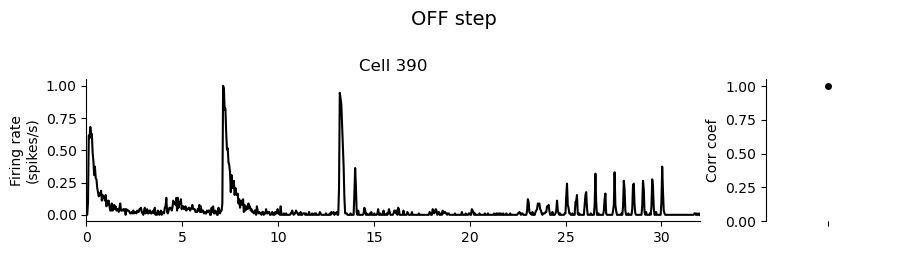

OFF slow : [140 408 508 625]
[0.54606666 0.76461045 0.78328387]
[0.54606666 0.42514543 0.66085704]
[0.76461045 0.42514543 0.74826007]
[0.78328387 0.66085704 0.74826007]


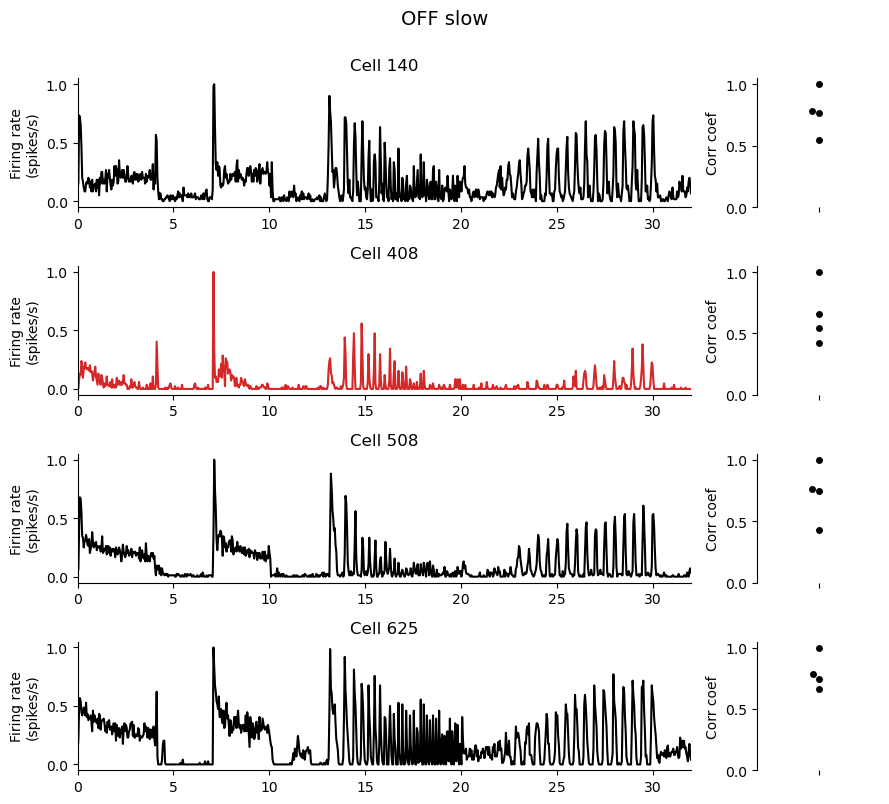

OFF alpha sustained : [437 677]
[0.91801291]
[0.91801291]


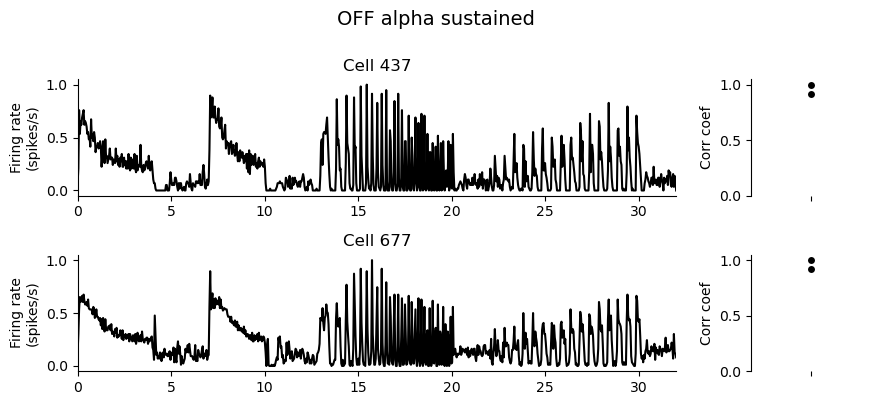

ON-OFF JAM-B : [399 401]
[0.95022136]
[0.95022136]


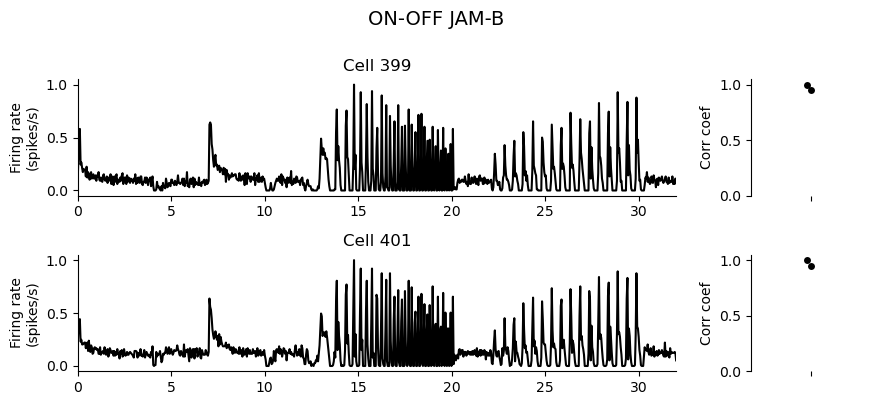

OFF alpha transient : [ 43  79 422]
[0.23305286 0.23910591]
[0.23305286 0.91418738]
[0.23910591 0.91418738]


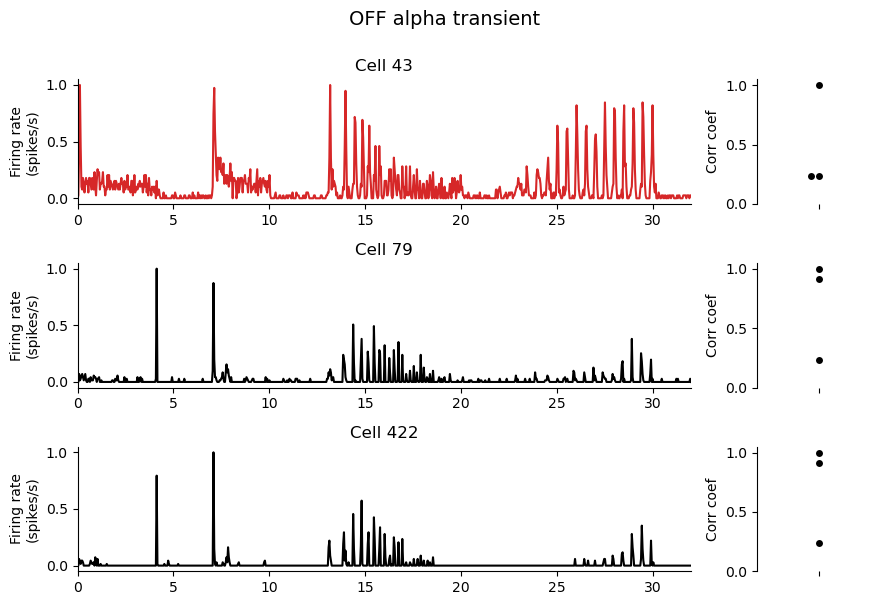

ON-OFF local-edge W3 : [188 434 614]
[0.24029931 0.61712125]
[0.24029931 0.43467584]
[0.61712125 0.43467584]


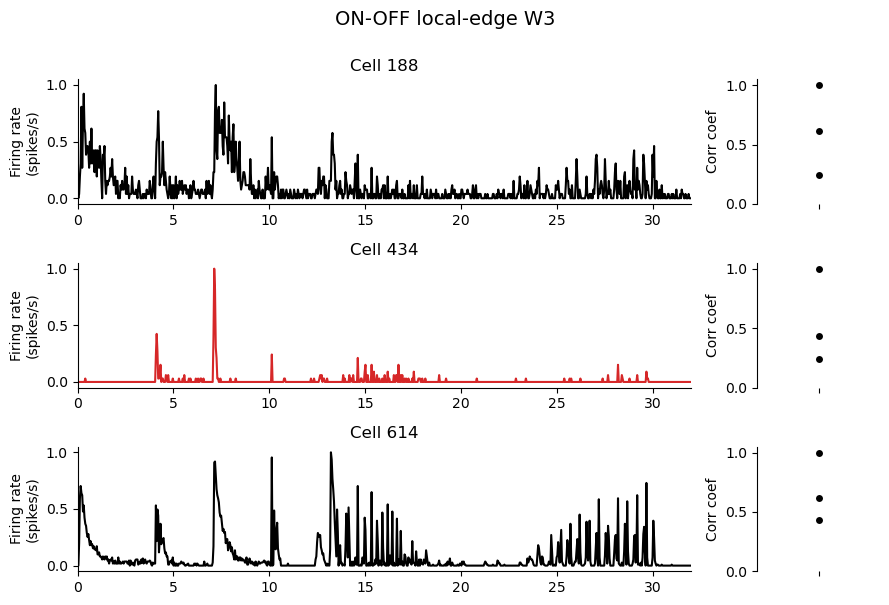

ON-OFF local OS : [ 27 558 681]
[0.50232978 0.24599244]
[0.50232978 0.54421519]
[0.24599244 0.54421519]


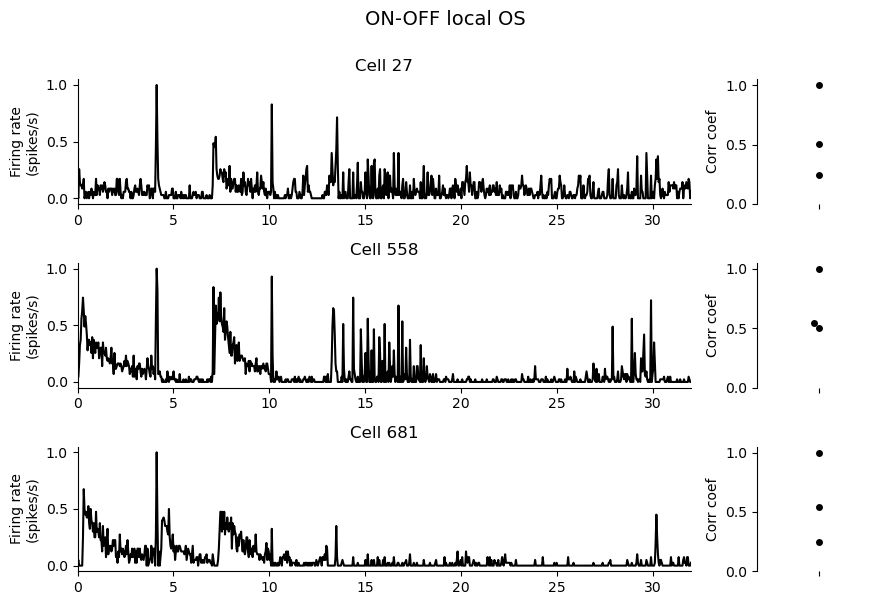

ON step : [278 561]
[0.79956622]
[0.79956622]


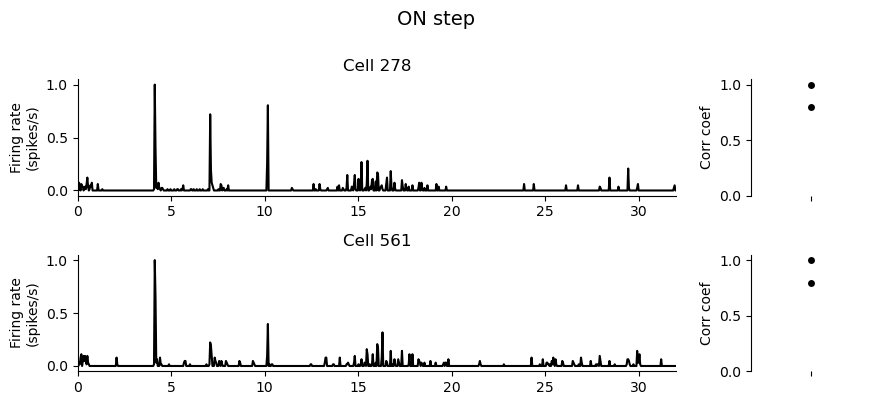

ON local transient OS : [ 25  81 123 170 242]
[0.69532311 0.83109827 0.73989676 0.91623928]
[0.69532311 0.76684344 0.72049807 0.64790693]
[0.83109827 0.76684344 0.80827612 0.85028384]
[0.73989676 0.72049807 0.80827612 0.73518865]
[0.91623928 0.64790693 0.85028384 0.73518865]


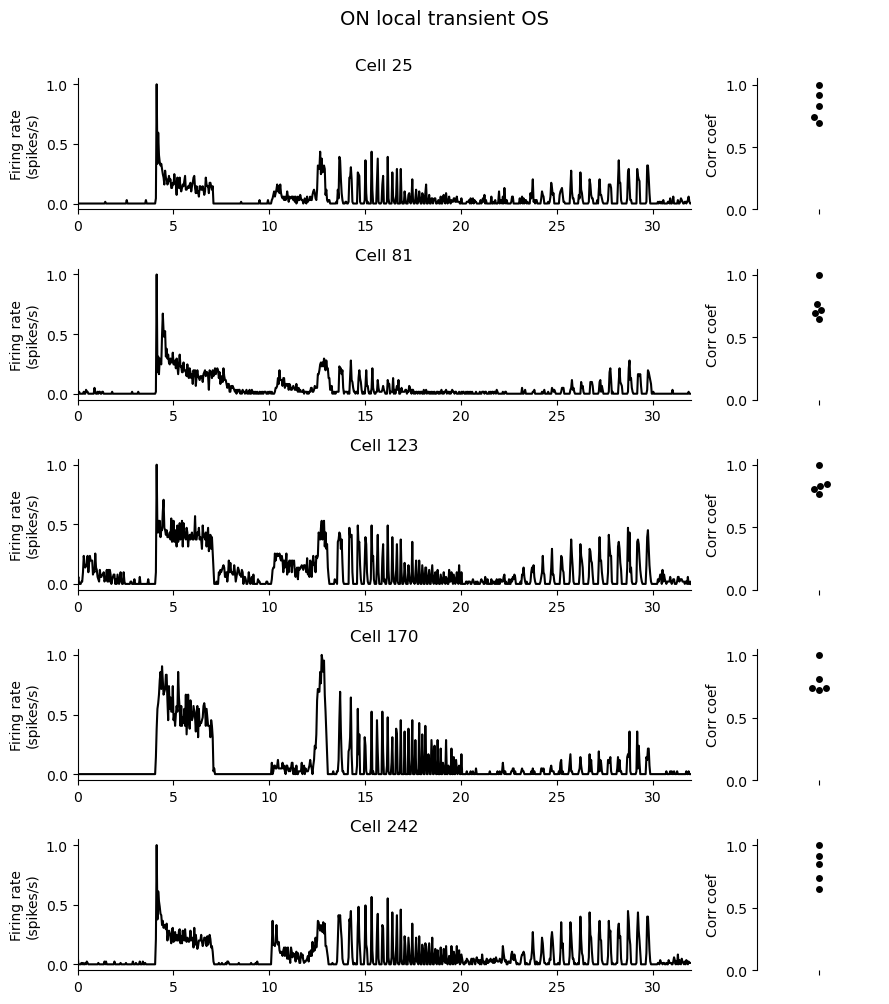

ON transient large : [141 192 314 357 417]
[0.83076971 0.9620222  0.90746662 0.95494105]
[0.83076971 0.78456168 0.90118201 0.7936444 ]
[0.9620222  0.78456168 0.90395658 0.97367991]
[0.90746662 0.90118201 0.90395658 0.92851284]
[0.95494105 0.7936444  0.97367991 0.92851284]


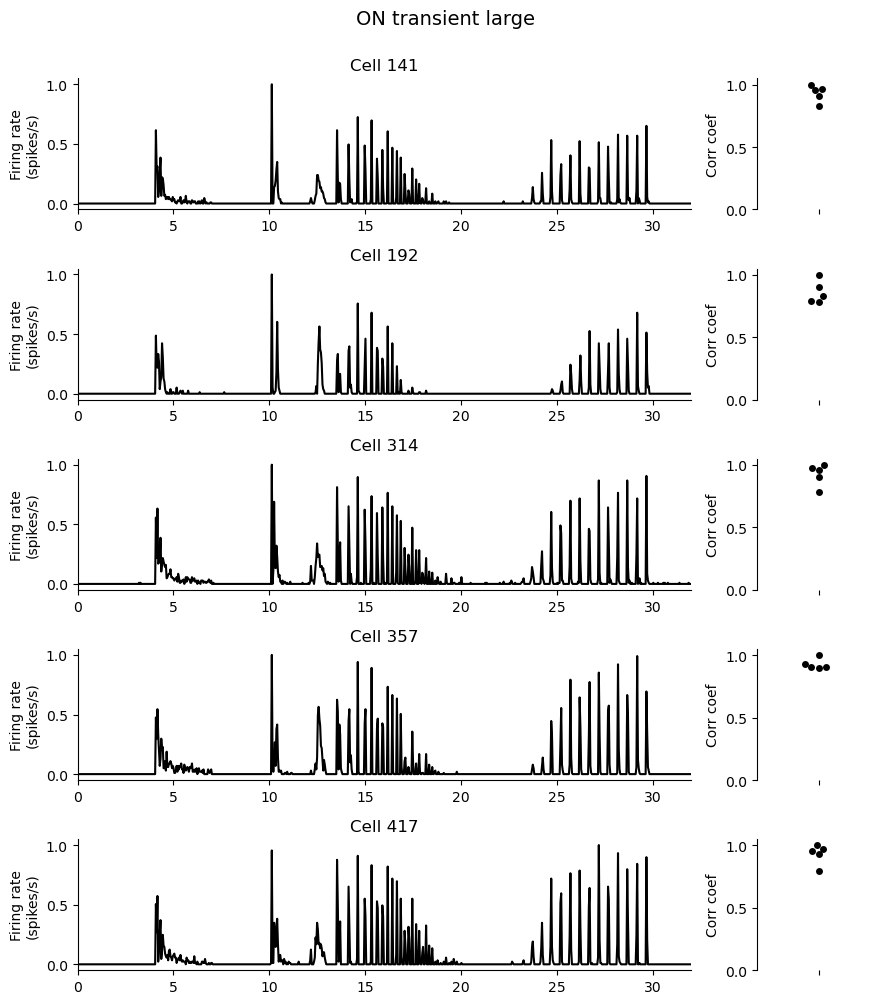

ON high frequency : [ 45 366 525]
[0.8080622  0.91412887]
[0.8080622  0.80552219]
[0.91412887 0.80552219]


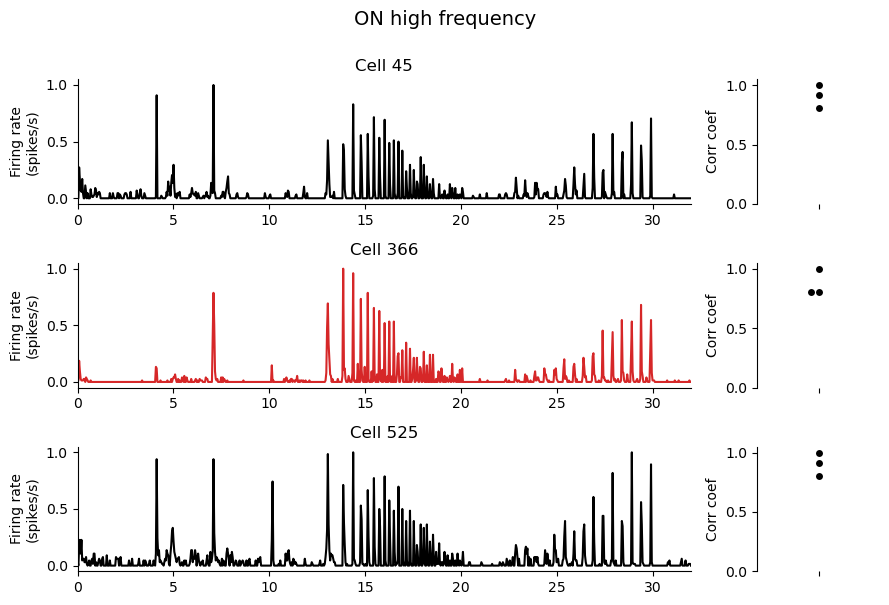

ON low frequency : [533 547 682]
[0.78128386 0.61830212]
[0.78128386 0.66296604]
[0.61830212 0.66296604]


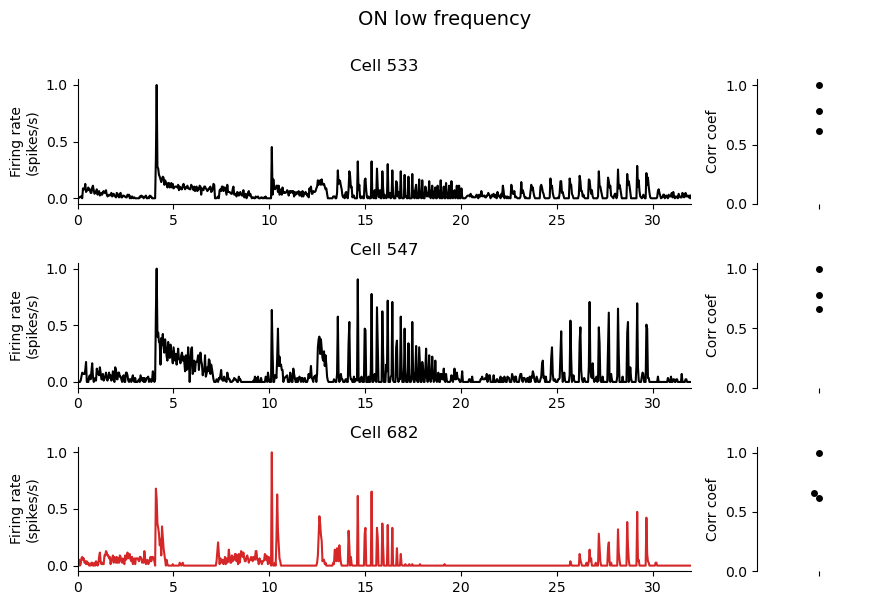

ON sustained : [588]
[]


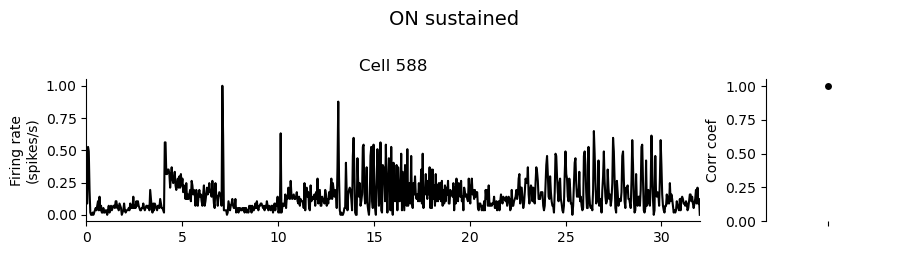

ON mini alpha : [ 76  96 187 206 236 306 396 502 516 541 550 555 565]
[0.59881309 0.94676872 0.92905937 0.98020437 0.86563538 0.7799052
 0.89982811 0.7837466  0.95248241 0.75478253 0.95968923 0.85045141]
[0.59881309 0.46537475 0.45778784 0.57610733 0.41338538 0.85383805
 0.42225545 0.77040452 0.51599298 0.59337833 0.55586517 0.36966408]
[0.94676872 0.46537475 0.9508961  0.95053701 0.90588368 0.63656908
 0.93965288 0.69518305 0.94857664 0.71472284 0.95753775 0.92504217]
[0.92905937 0.45778784 0.9508961  0.93875378 0.87486308 0.61894272
 0.92758091 0.70358468 0.93112581 0.75758173 0.96044988 0.89759746]
[0.98020437 0.57610733 0.95053701 0.93875378 0.87121241 0.75648867
 0.91278938 0.7729018  0.95038536 0.75732178 0.95853845 0.86741425]
[0.86563538 0.41338538 0.90588368 0.87486308 0.87121241 0.58700087
 0.90817518 0.61694909 0.87126944 0.68994591 0.88099607 0.8911523 ]
[0.7799052  0.85383805 0.63656908 0.61894272 0.75648867 0.58700087
 0.57745415 0.83483618 0.6935599  0.66763349 0.7163921

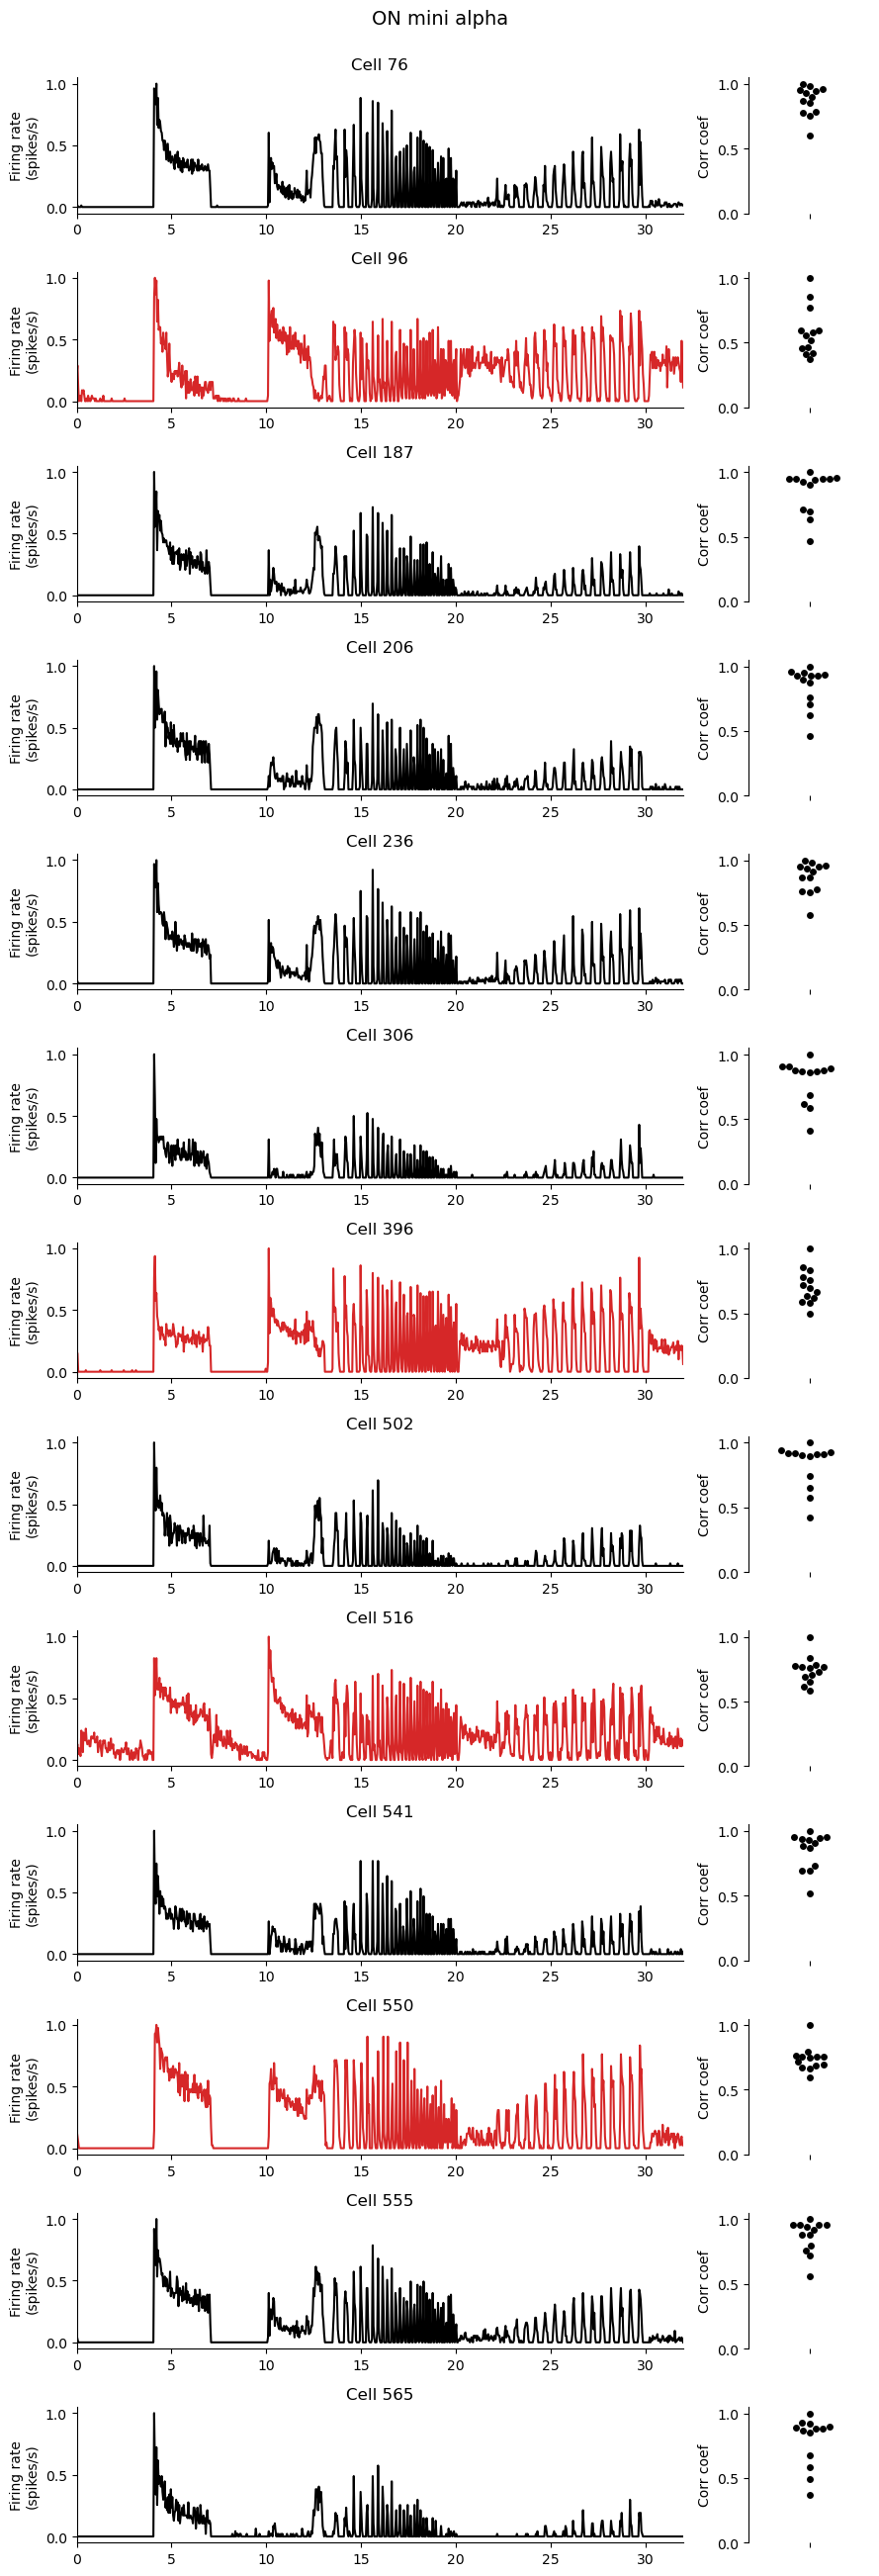

ON alpha : [  1 258 404 406 433 577 578 603 604]
[0.97124084 0.97957943 0.98419815 0.95064343 0.87048573 0.84664155
 0.88560824 0.92919269]
[0.97124084 0.97496317 0.97865488 0.97367614 0.90523039 0.90838571
 0.93507561 0.96283433]
[0.97957943 0.97496317 0.98558283 0.97131851 0.92295169 0.89132567
 0.92440403 0.95790239]
[0.98419815 0.97865488 0.98558283 0.97626805 0.90923635 0.89028436
 0.92483951 0.95523121]
[0.95064343 0.97367614 0.97131851 0.97626805 0.95338776 0.94327325
 0.96755383 0.9775726 ]
[0.87048573 0.90523039 0.92295169 0.90923635 0.95338776 0.95278052
 0.96853877 0.95035878]
[0.84664155 0.90838571 0.89132567 0.89028436 0.94327325 0.95278052
 0.97579885 0.95158981]
[0.88560824 0.93507561 0.92440403 0.92483951 0.96755383 0.96853877
 0.97579885 0.96726715]
[0.92919269 0.96283433 0.95790239 0.95523121 0.9775726  0.95035878
 0.95158981 0.96726715]


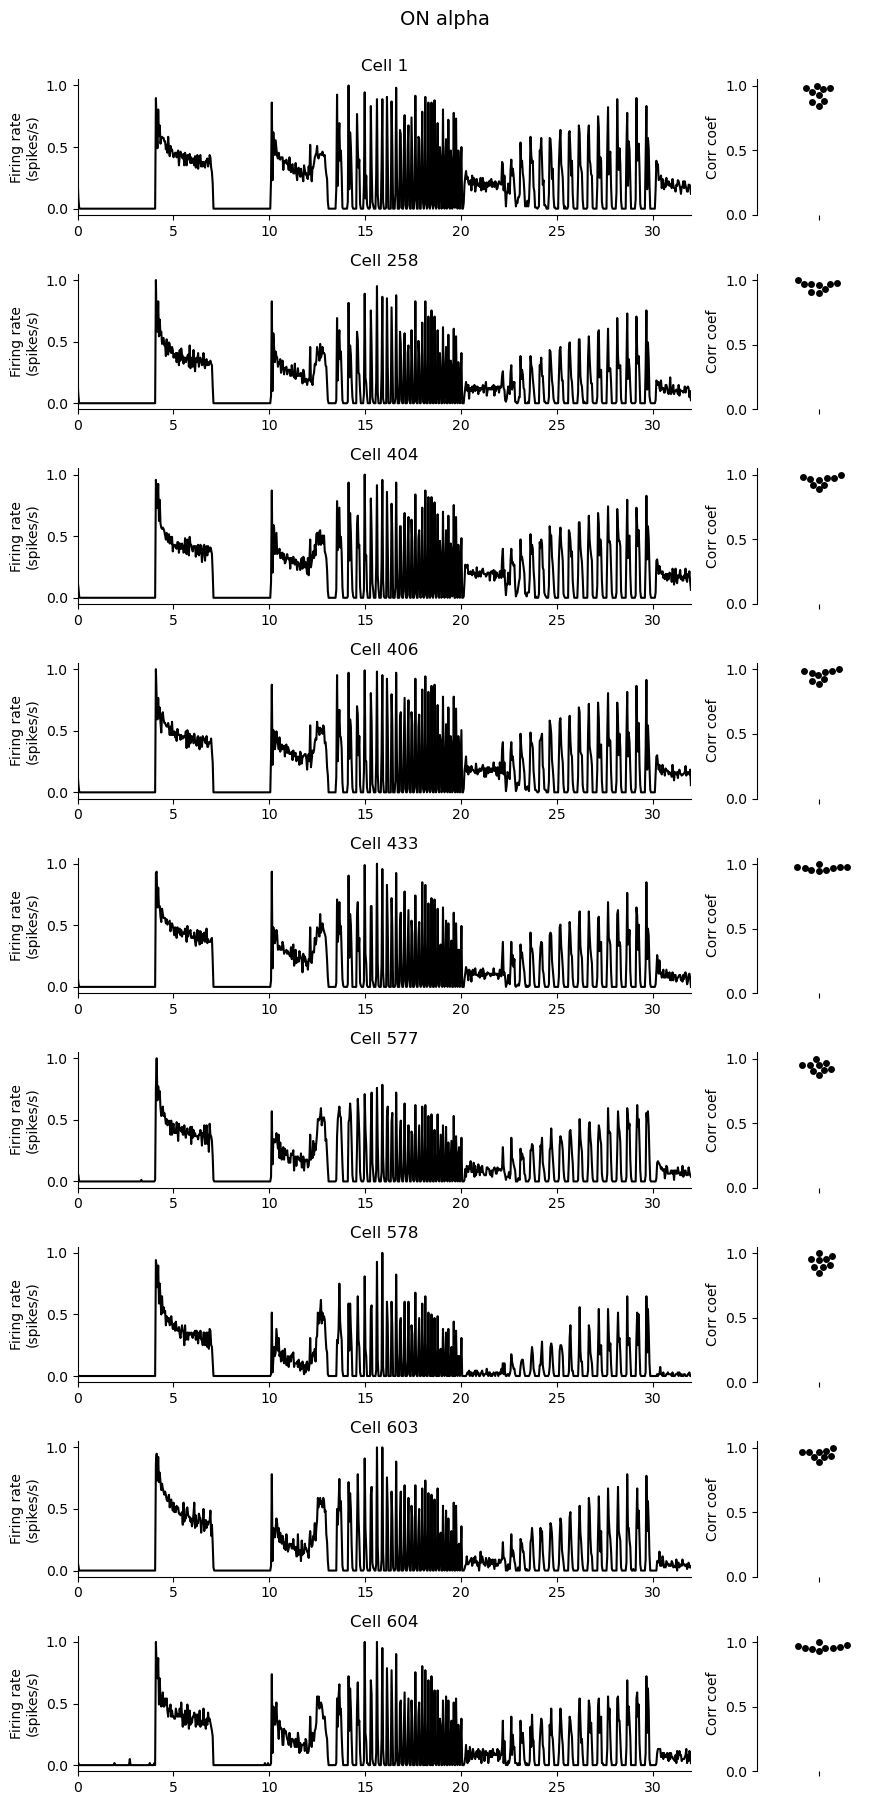

ON DS sustained 1 : [157 259]
[0.6283302]
[0.6283302]


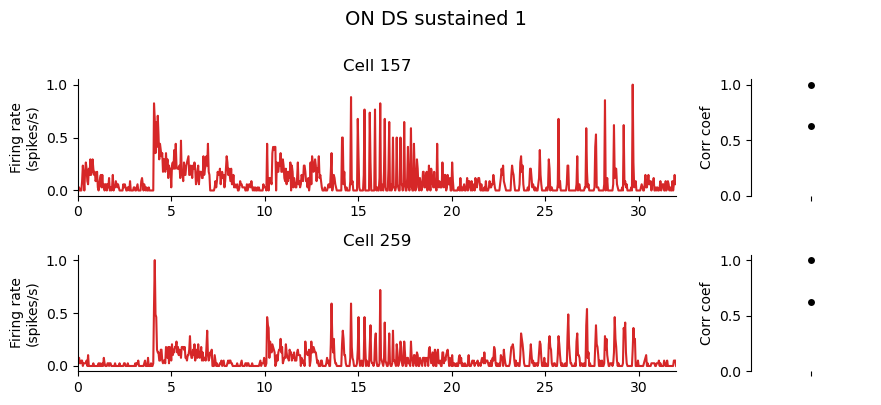

ON DS sustained 3 : [305 387]
[0.8058641]
[0.8058641]


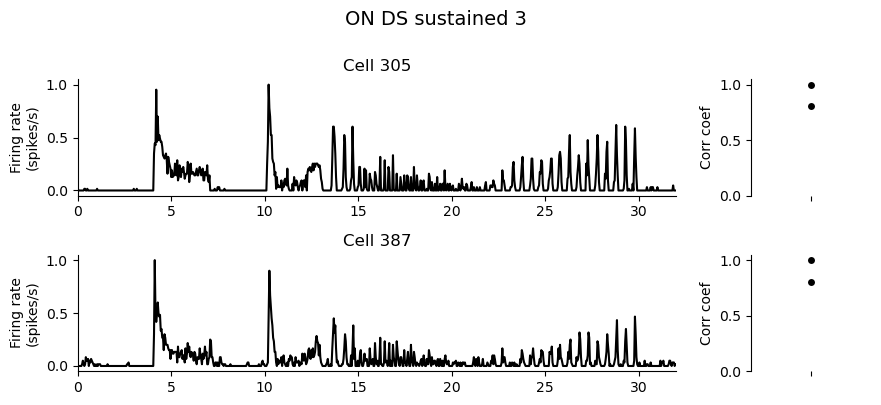

OFF suppression 1 : [ 80 125 126 131]
[0.73594074 0.58695186 0.76484445]
[0.73594074 0.54038756 0.72566226]
[0.58695186 0.54038756 0.50225355]
[0.76484445 0.72566226 0.50225355]


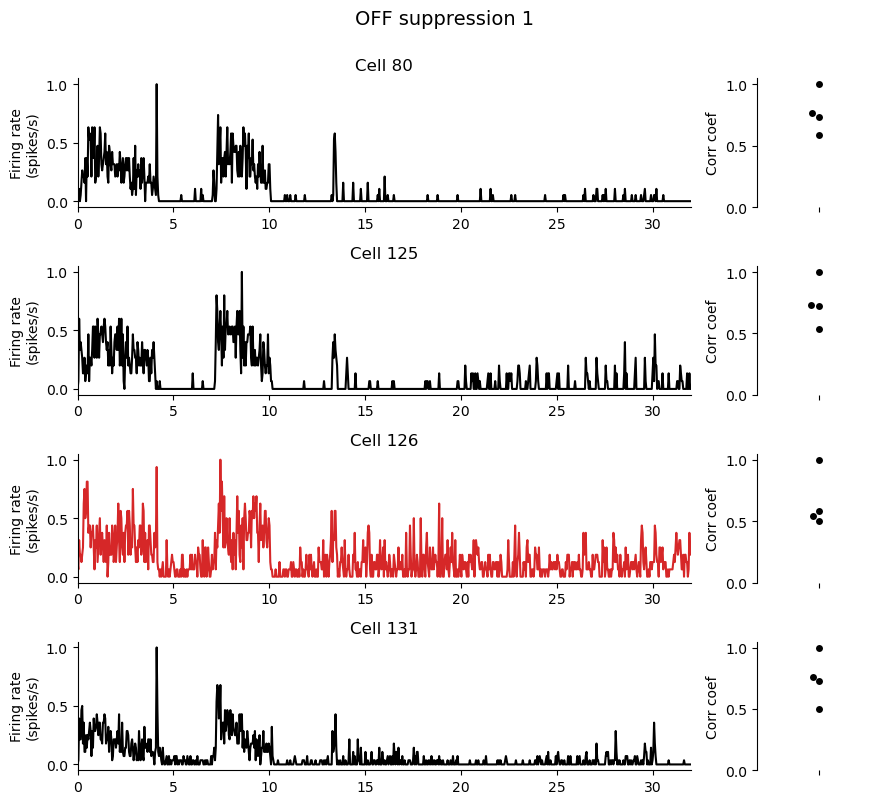

In [12]:
cell_types_cleaned = np.copy(cell_types)
# euler_labels_cleaning = zeros(len(euler_labels)) # 0: present but not cleaned type not present, 1: , 2: cleaned

baseline_len = 4 # sec
dt = 0.04 # sec
baseline_end = int(baseline_len / dt)

for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(9, 2.5))
        else:
            fig = plt.figure(figsize=(9, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 2, width_ratios = [5,1])

        cross_corrs = np.zeros((len(selected_cells), len(selected_cells)))
        
        removed_cells = []

        for i, cell_nb in enumerate(selected_cells):
            cell_index = where(cells_clustering == cell_nb)[0][0]
#             print (cell_nb, cells_clustering[cell_index])

            psth = cell_data[cell_nb]['psth']

            # Normalization
            psth = psth/max(psth)

            # Cross corr
            for j, cell_nb2 in enumerate(selected_cells):
                psth2 = cell_data[cell_nb2]['psth']
                # Normalization
                psth2 = psth2/max(psth2)

                cross_corrs[i,j] = np.corrcoef(psth, psth2)[0,1]
            
            # Remove that cell ?
            print (np.delete(cross_corrs[i], i))
            
            ax = fig.add_subplot(GS[i,0])
            
            if euler_label_names[iLabel] == 'ON-OFF local-edge W3' :
                threshold = 0.6
            elif euler_label_names[iLabel] == 'ON-OFF local OS':
                threshold = 0.5
            elif euler_label_names[iLabel] == 'ON mini alpha' or euler_label_names[iLabel] == 'ON high frequency':
                threshold = 0.86
            elif euler_label_names[iLabel] == 'OFF suppression 1':
                threshold = 0.7
            else:
                threshold = 0.75
            
            if len(selected_cells) > 1 and all(delete(cross_corrs[i], i) < threshold):
                ax.plot(np.linspace(0,32,800), psth, 'C3')
                removed_cells.append(cell_index)
                cell_types_cleaned[cell_index] = nan
            else:
                ax.plot(np.linspace(0,32,800), psth, 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
                
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
                
            ax = fig.add_subplot(GS[i,1])
            sns.swarmplot(y=cross_corrs[i], color='k')
            ax.set_ylim(0,1.05)
            ax.set_ylabel('Corr coef')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        plt.tight_layout()

#         plt.figure()
#         plt.title(cell_type)
#         sns.heatmap(cross_corrs, xticklabels=selected_cells, yticklabels=selected_cells, vmin = 0, vmax = 1)

        plt.show()
        
#         # Removing bad cells (except if all cells are bad in a type, in which case we keep them)
#         print ('Removed', len(removed_cells), 'cells among', len(selected_cells))
        
#         if len(removed_cells) < len(selected_cells):
#             cell_types_cleaned[removed_cells] = nan
#             euler_labels_cleaning[iLabel] = 2
#         elif len(removed_cells) == len(selected_cells):
#             euler_labels_cleaning[iLabel] = 1

#         # Other try: when all cells in a type have low cross corr, we also set their type to NAN and will compare the new
#         # and old types later
#         print ('Removed', len(removed_cells), 'cells among', len(selected_cells))
#         cell_types_cleaned[removed_cells] = nan
        

In [27]:
cell_types_cleaned

array([23., 16., 13., nan, 19., 22.,  7., 30., 16., nan, 16., 30., nan,
       30.,  3., 18., nan, 16., 22.,  9., 18., 22., 22., 16., 23., nan,
       14., 28., 22., 18., 18., nan, 28.,  2., nan,  5.,  5., 23., 23.,
       nan, 18.,  7., 23., nan,  4., 22.,  3., nan, 19., 20., 22., 20.,
       nan, 22., 13., 14., 22., 23., 23., 21., 23., 23.,  9., nan,  3.,
        4., 13., nan])

In [28]:
cell_types

array([23., 16., 13.,  7., 19., 22.,  7., 30., 16., 22., 16., 30., 30.,
       30.,  3., 18., 24., 16., 22.,  9., 18., 22., 22., 16., 23., 24.,
       14., 28., 22., 18., 18., 19., 28.,  2., 22.,  5.,  5., 23., 23.,
        3., 18.,  7., 23.,  9.,  4., 22.,  3., 22., 19., 20., 22., 20.,
       22., 22., 13., 14., 22., 23., 23., 21., 23., 23.,  9., nan,  3.,
        4., 13., 20.])

## Plot new types

OFF step : [390]


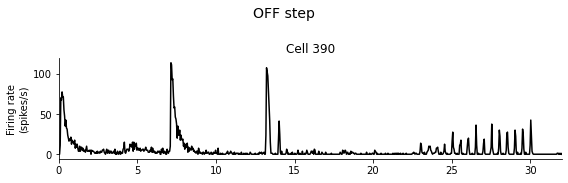

OFF slow : [140 508 625]


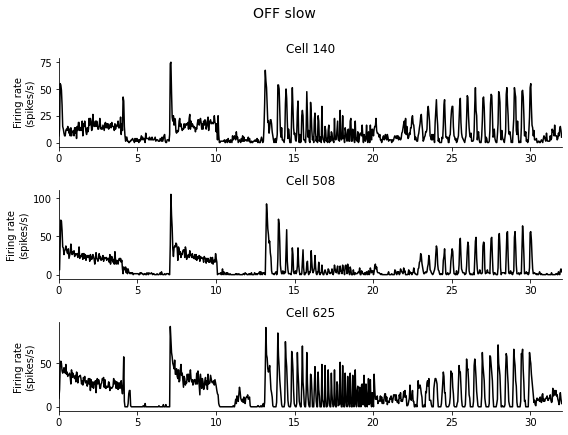

OFF alpha sustained : [437 677]


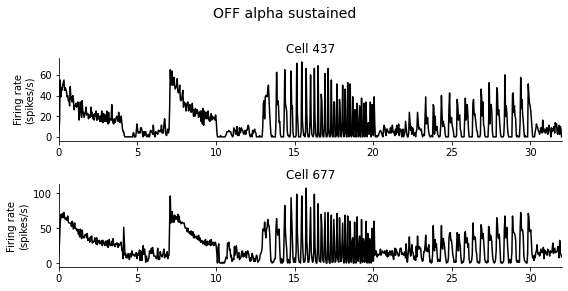

ON-OFF JAM-B : [399 401]


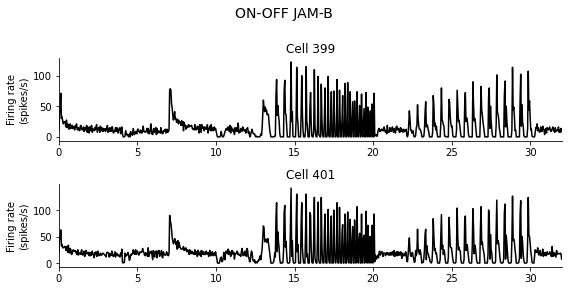

OFF alpha transient : [ 79 422]


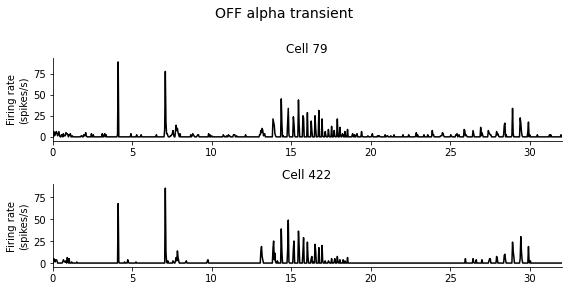

ON-OFF local-edge W3 : [188 614]


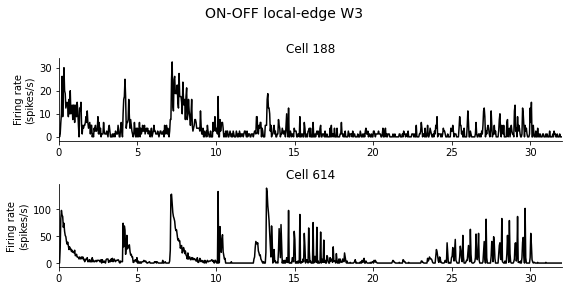

ON-OFF local OS : [ 27 558 681]


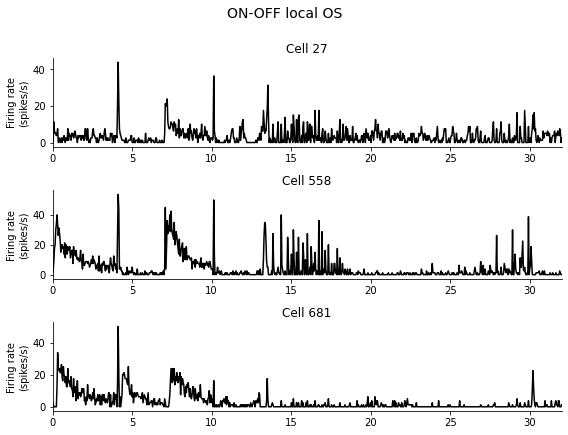

ON step : [278 561]


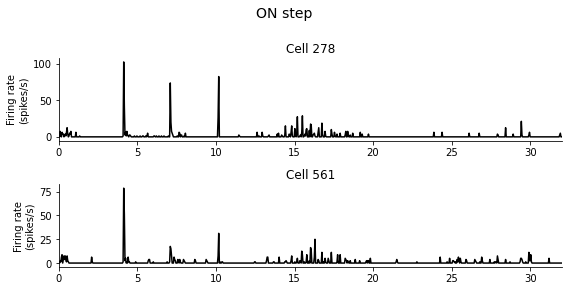

ON local transient OS : [ 25  81 123 170 242]


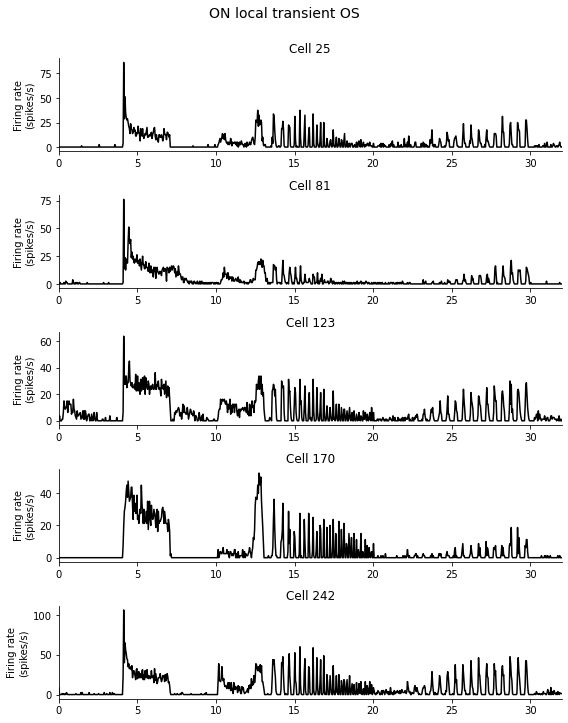

ON transient large : [141 192 314 357 417]


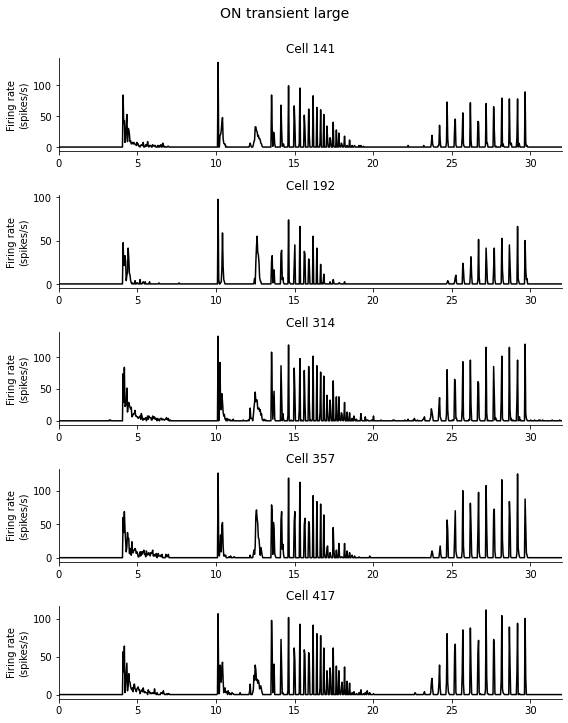

ON high frequency : [ 45 525]


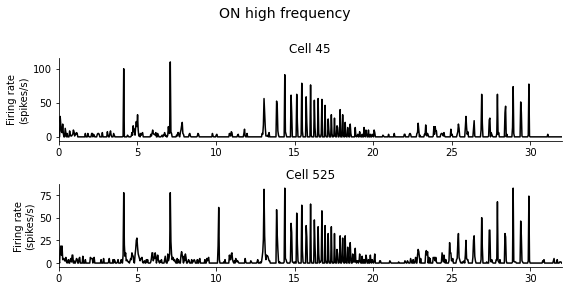

ON low frequency : [533 547]


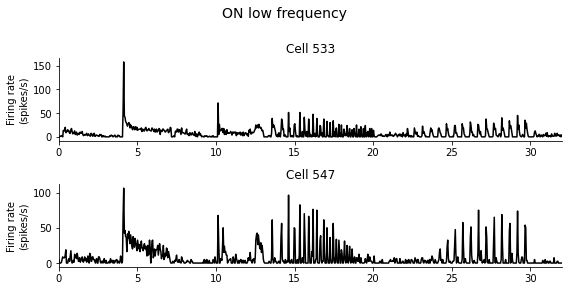

ON sustained : [588]


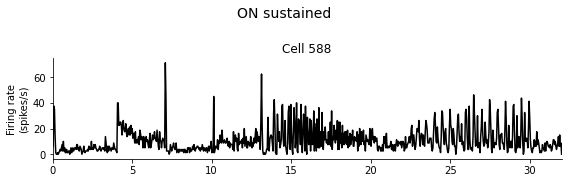

ON mini alpha : [ 76 187 206 236 306 502 541 555 565]


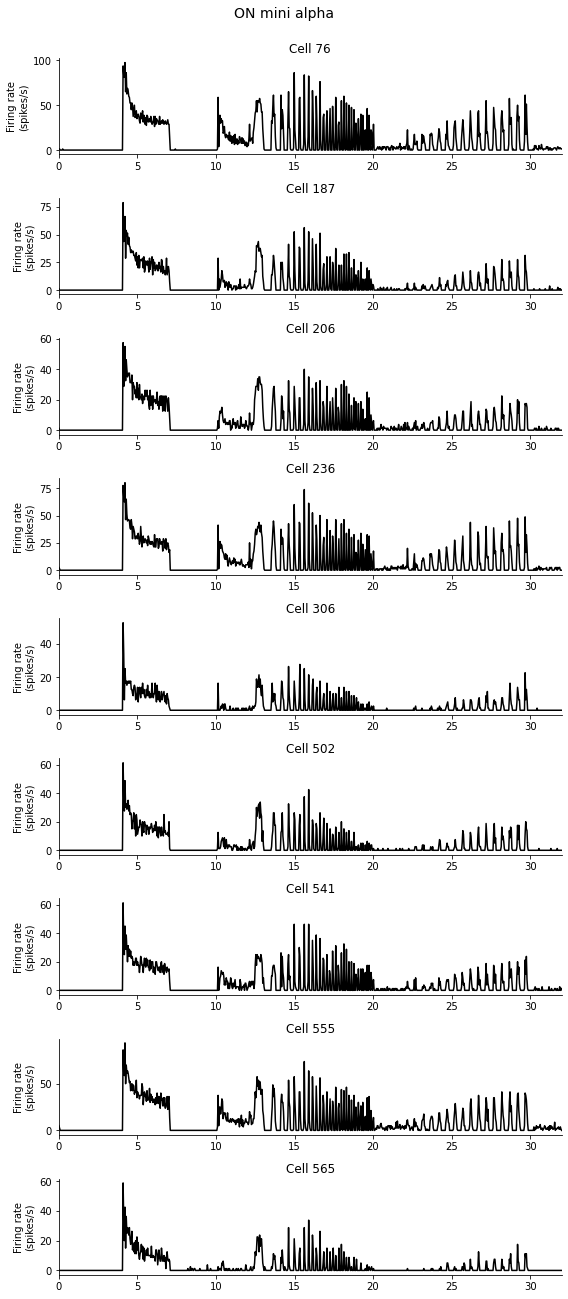

ON alpha : [  1 258 404 406 433 577 578 603 604]


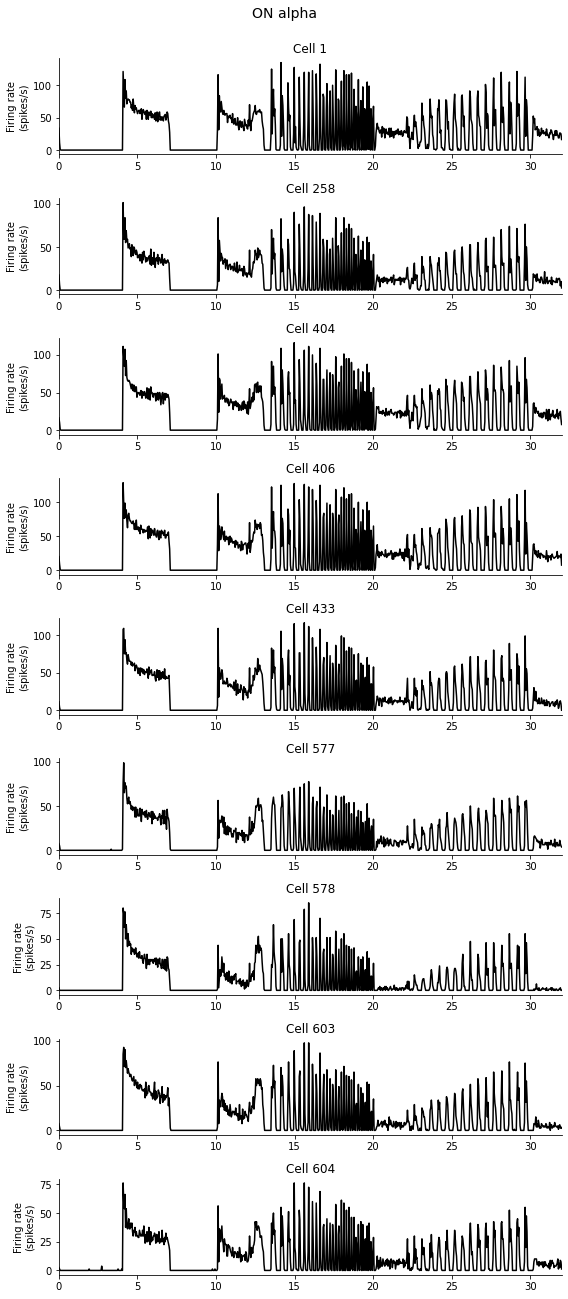

ON DS sustained 3 : [305 387]


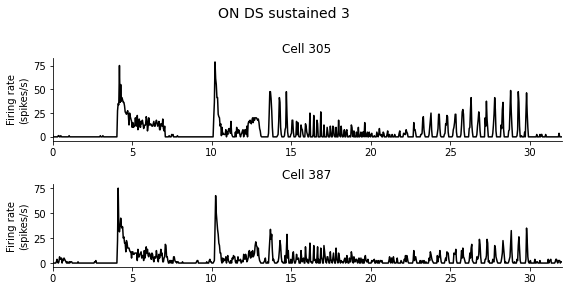

OFF suppression 1 : [ 80 125 131]


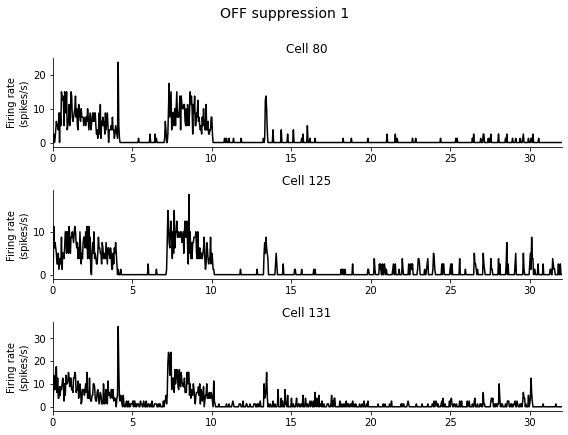

In [29]:
for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types_cleaned == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(8, 2.5))
        else:
            fig = plt.figure(figsize=(8, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 1)

        for i, cell_nb in enumerate(selected_cells):

            psth = cell_data[cell_nb]['psth']
            
            ax = fig.add_subplot(GS[i])
#             if euler_labels_cleaning[iLabel] == 1:
            ax.plot(np.linspace(0,32,800), psth, 'k')
#             elif euler_labels_cleaning[iLabel] == 0:
#                 ax.plot(np.linspace(0,32,800), psth, 'C3')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
        
        plt.tight_layout()
        plt.show()

In [14]:
# Save cleaned Baden type for each cell in 'selected_cells'
fsave = exp_path + str(exp) + '_celltype_Baden_cleaned_2024'
save_obj(cell_types_cleaned,fsave)